In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
plt.rcParams['figure.dpi']=300

In [2]:
@jit(nopython=True)
def initialize_lattice(size):
    lattice = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if np.random.random() >= 0.75:
                lattice[i, j] = 1
            else:
                lattice[i, j] = -1
    return lattice


# energy calculation
@jit(nopython=True)
def calculate_energy(lattice):
    energy = 0
    size = lattice.shape[0]
    for i in range(size):
        for j in range(size):
            spin = lattice[i, j]
            neighbors = lattice[(i + 1) % size, j] + lattice[i, (j + 1) % size] + lattice[(i - 1) % size, j] + lattice[i, (j - 1) % size]
            energy += -spin * neighbors
    return energy

# Magnetization calculation
@jit(nopython=True)
def calculate_magnetization(lattice):
    return np.sum(lattice)

# Metropolis steps
@jit(nopython=True)
def metropolis_step(lattice, temperature):
    size = lattice.shape[0]
    i = np.random.randint(size)
    j = np.random.randint(size)
    spin = lattice[i, j]
    neighbors = lattice[(i + 1) % size, j] + lattice[i, (j + 1) % size] + lattice[(i - 1) % size, j] + lattice[i, (j - 1) % size]
    energy_diff = 2 * spin * neighbors
    if energy_diff < 0 or np.random.rand() < np.exp(-energy_diff / temperature):
        lattice[i, j] = -spin
    return lattice

# Simulation
def run_simulation(size, temperature, num_steps, equilibration_steps):    
    lattice = initialize_lattice(size)
    Lattice_init = None
    Lattice_eq = None
    if temperature==2:
        Lattice_init=lattice.copy()
    energy_vals = []
    magnetization_vals = []
    for step in range(num_steps):
        for _ in range(equilibration_steps):
            lattice = metropolis_step(lattice, temperature)
        energy = calculate_energy(lattice)
        magnetization = calculate_magnetization(lattice)
        energy_vals.append(energy)
        magnetization_vals.append(magnetization)
    if temperature==2:
        Lattice_eq=lattice.copy()
    return energy_vals, magnetization_vals, Lattice_init, Lattice_eq 

# calculate mean values
def calculate_mean(values):
    return np.mean(values)

# calculate heat capacity
def calculate_specific_heat(energy_vals, temperature):
    energy_squared = np.mean(np.array(energy_vals) ** 2)
    energy_mean = calculate_mean(energy_vals)
    return ((energy_squared - energy_mean ** 2) / (temperature**2))

# calculate magnetic susceptibility
def calculate_magnetic_susceptibility(magnetization_vals, temperature):
    magnetization_squared = np.mean(np.array(magnetization_vals) ** 2)
    magnetization_mean = calculate_mean(magnetization_vals)
    return ((magnetization_squared - magnetization_mean ** 2) / temperature)

# calculate binder cumulant
def calculate_binder_cumulant(magnetization_vals):
    magnetization_fourth = np.mean(np.array(magnetization_vals) ** 4)
    magnetization_squared = np.mean(np.array(magnetization_vals) ** 2)
    return 1 - magnetization_fourth / (3 * magnetization_squared ** 2)      



In [3]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 2000  # number of steps in the simulation
equilibration_steps = 1500  # number of steps for the system to reach equilibrium

# List of lattice sizes
sizes = [20, 30]


# Run the simulation for each size (size=30)
for size in sizes:
    # Initialize a list to store DataFrames
    dfs = []

    for temperature in temperatures:
        # Run the simulation
        if temperature == 2:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)

        energy_mean = calculate_mean(energy_vals)
        magnetization_mean = calculate_mean(magnetization_vals)

        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the list of DataFrames
        dfs.append(df_temp)

    # Concatenate all DataFrames in the list
    df = pd.concat(dfs, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


In [4]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 1000  # number of steps in the simulation
equilibration_steps = 800  # number of steps for the system to reach equilibrium

# List of lattice sizes
sizes = [10]


# Run the simulation for each size (size=30)
for size in sizes:
    # Initialize a list to store DataFrames
    dfs = []

    for temperature in temperatures:
        # Run the simulation
        if temperature == 2:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)

        energy_mean = calculate_mean(energy_vals)
        magnetization_mean = calculate_mean(magnetization_vals)

        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the list of DataFrames
        dfs.append(df_temp)

    # Concatenate all DataFrames in the list
    df = pd.concat(dfs, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


In [ ]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 4000  # number of steps in the simulation
equilibration_steps = 3000  # number of steps for the system to reach equilibrium

# List of lattice sizes
sizes = [40, 50]


# Run the simulation for each size (size=30)
for size in sizes:
    # Initialize a list to store DataFrames
    dfs = []

    for temperature in temperatures:
        # Run the simulation
        if temperature == 2:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)

        energy_mean = calculate_mean(energy_vals)
        magnetization_mean = calculate_mean(magnetization_vals)

        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the list of DataFrames
        dfs.append(df_temp)

    # Concatenate all DataFrames in the list
    df = pd.concat(dfs, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


In [6]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 4000  # number of steps in the simulation
equilibration_steps = 3000  # number of steps for the system to reach equilibrium

# List of lattice sizes
sizes = [60, 70]


# Run the simulation for each size (size=30)
for size in sizes:
    # Initialize a list to store DataFrames
    dfs = []

    for temperature in temperatures:
        # Run the simulation
        if temperature == 2:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
            energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)

        energy_mean = calculate_mean(energy_vals)
        magnetization_mean = calculate_mean(magnetization_vals)

        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the list of DataFrames
        dfs.append(df_temp)

    # Concatenate all DataFrames in the list
    df = pd.concat(dfs, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


In [4]:
# reading data obtained from the metropolis algorithm
lattice_10 = pd.read_excel("lattice_10.xlsx", skiprows=1, header=None)
lattice_20 = pd.read_excel("lattice_20.xlsx", skiprows=1, header=None)
lattice_30 = pd.read_excel("lattice_30.xlsx", skiprows=1, header=None)
lattice_40 = pd.read_excel("lattice_40.xlsx", skiprows=1, header=None)
lattice_50 = pd.read_excel("lattice_50.xlsx", skiprows=1, header=None)
lattice_60 = pd.read_excel("lattice_60.xlsx", skiprows=1, header=None)
lattice_70 = pd.read_excel("lattice_70.xlsx", skiprows=1, header=None)
temperature = np.array(lattice_10.iloc[:, 0])

# Magnetic Susceptibility
MS_10 = np.array(lattice_10.iloc[:, 2])
MS_20 = np.array(lattice_20.iloc[:, 2])
MS_30 = np.array(lattice_30.iloc[:, 2])
MS_40 = np.array(lattice_40.iloc[:, 2])
MS_50 = np.array(lattice_50.iloc[:, 2])
MS_60 = np.array(lattice_50.iloc[:, 2])
MS_70 = np.array(lattice_50.iloc[:, 2])

# Heat Capacity
HC_10 = np.array(lattice_10.iloc[:, 1])
HC_20 = np.array(lattice_20.iloc[:, 1])
HC_30 = np.array(lattice_30.iloc[:, 1])
HC_40 = np.array(lattice_40.iloc[:, 1])
HC_50 = np.array(lattice_50.iloc[:, 1])
HC_60 = np.array(lattice_60.iloc[:, 1])
HC_70 = np.array(lattice_70.iloc[:, 1])

# Mean energy
ME_10 = np.array(lattice_10.iloc[:, 3])
ME_20 = np.array(lattice_20.iloc[:, 3])
ME_30 = np.array(lattice_30.iloc[:, 3])
ME_40 = np.array(lattice_40.iloc[:, 3])
ME_50 = np.array(lattice_50.iloc[:, 3])
ME_60 = np.array(lattice_60.iloc[:, 3])
ME_70 = np.array(lattice_70.iloc[:, 3])

# Mean magnetisation
MM_10 = np.array(lattice_10.iloc[:, 4])
MM_20 = np.array(lattice_20.iloc[:, 4])
MM_30 = np.array(lattice_30.iloc[:, 4])
MM_40 = np.array(lattice_40.iloc[:, 4])
MM_50 = np.array(lattice_50.iloc[:, 4])
MM_60 = np.array(lattice_60.iloc[:, 4])
MM_70 = np.array(lattice_70.iloc[:, 4])

# binder cumulant
BC_10 = np.array(lattice_10.iloc[:, 5])
BC_20 = np.array(lattice_20.iloc[:, 5])
BC_30 = np.array(lattice_30.iloc[:, 5])
BC_40 = np.array(lattice_40.iloc[:, 5])
BC_50 = np.array(lattice_50.iloc[:, 5])
BC_60 = np.array(lattice_60.iloc[:, 5])
BC_70 = np.array(lattice_70.iloc[:, 5])

# Calculating the Curie temperature
MS = [MS_10, MS_20, MS_30, MS_40, MS_50, MS_60, MS_70, HC_10, HC_20, HC_30, HC_40, HC_50, HC_60, HC_70]
Critical_temps = []
for i in MS:
    max_temp = temperature[np.argmax(i)]
    Critical_temps.append(max_temp)
curie_temp = np.mean(Critical_temps)
err = np.std(Critical_temps)
print('cric_temp=',Critical_temps)
print('curie with err=',curie_temp, '', err)


cric_temp= [2.181818181818182, 2.242424242424242, 2.303030303030303, 2.333333333333333, 2.363636363636364, 2.363636363636364, 2.363636363636364, 2.272727272727272, 2.303030303030303, 2.303030303030303, 2.272727272727272, 2.303030303030303, 2.212121212121212, 1.0]
curie with err= 2.2012987012987018  0.3373638929730459


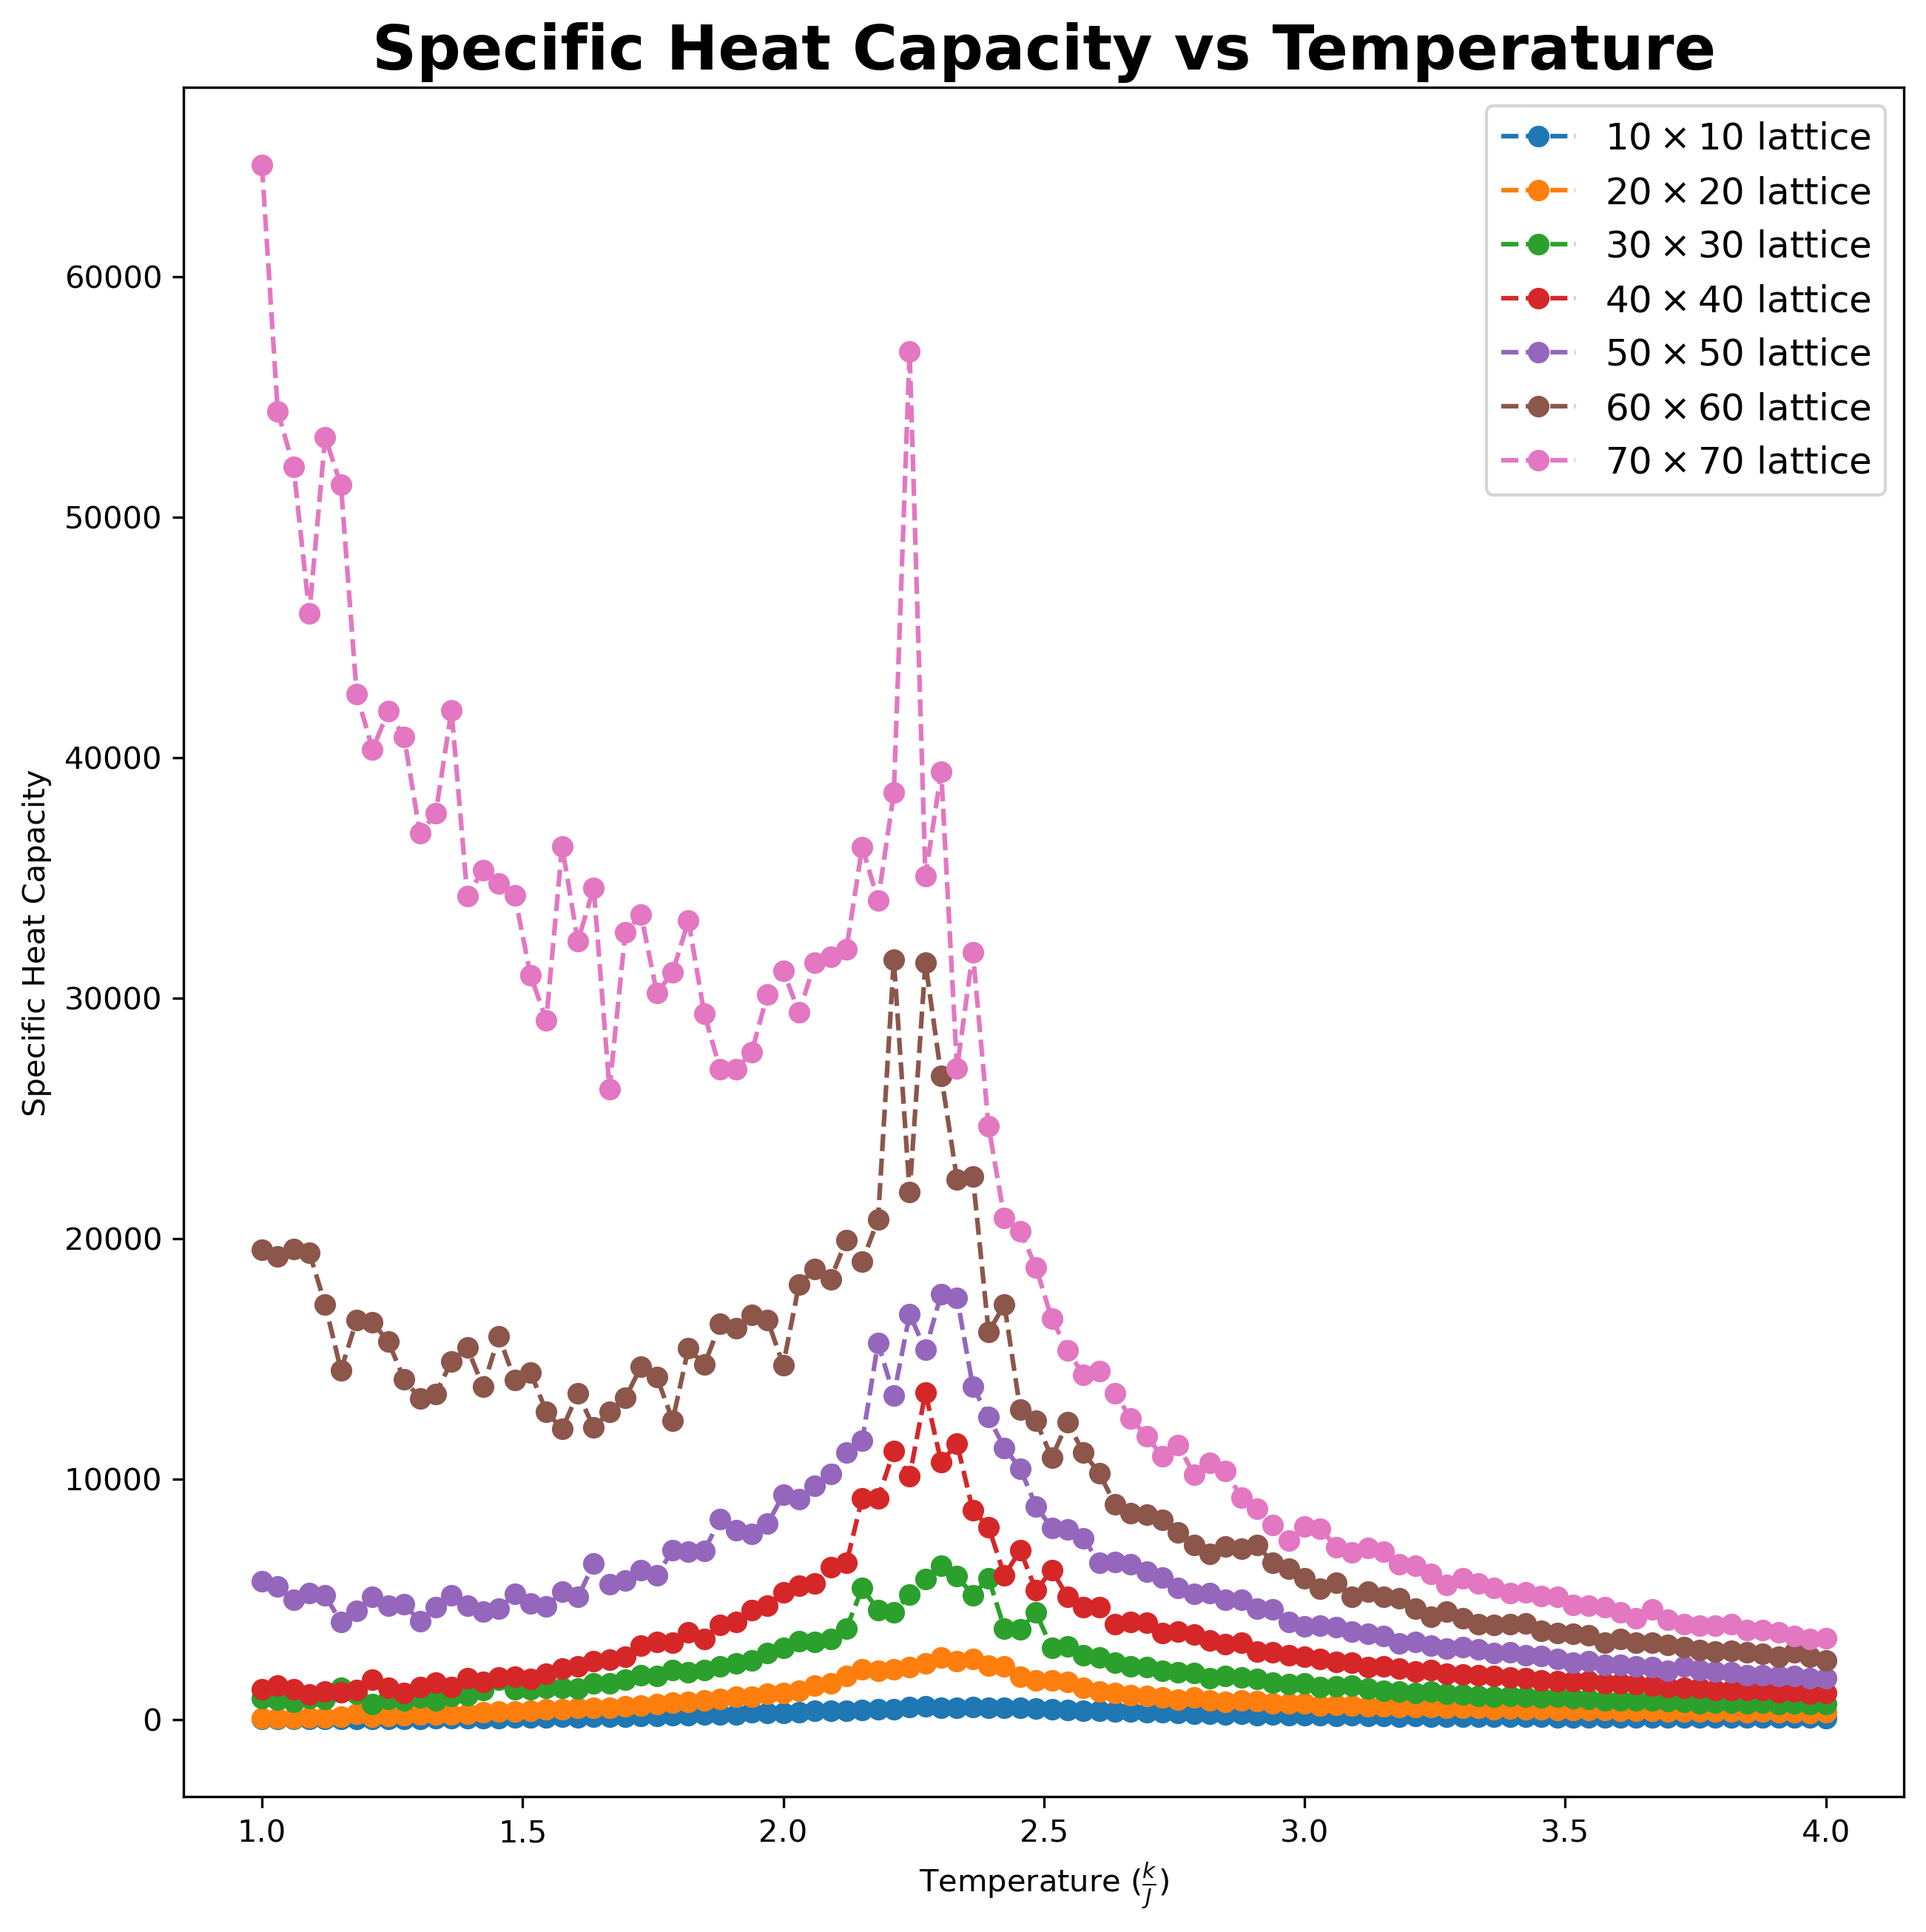

In [29]:
# plot heat capacity
plt.figure(figsize=(10,10))
plt.plot(temperature, HC_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, HC_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, HC_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, HC_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, HC_50, 'o--', label='$50 \\times 50$ lattice')
plt.plot(temperature, HC_60, 'o--', label='$60 \\times 60$ lattice')
plt.plot(temperature, HC_70, 'o--', label='$70 \\times 70$ lattice')
plt.title('Specific Heat Capacity vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{k}{J}$)')
plt.ylabel('Specific Heat Capacity')
plt.legend(fontsize=12)
plt.show()

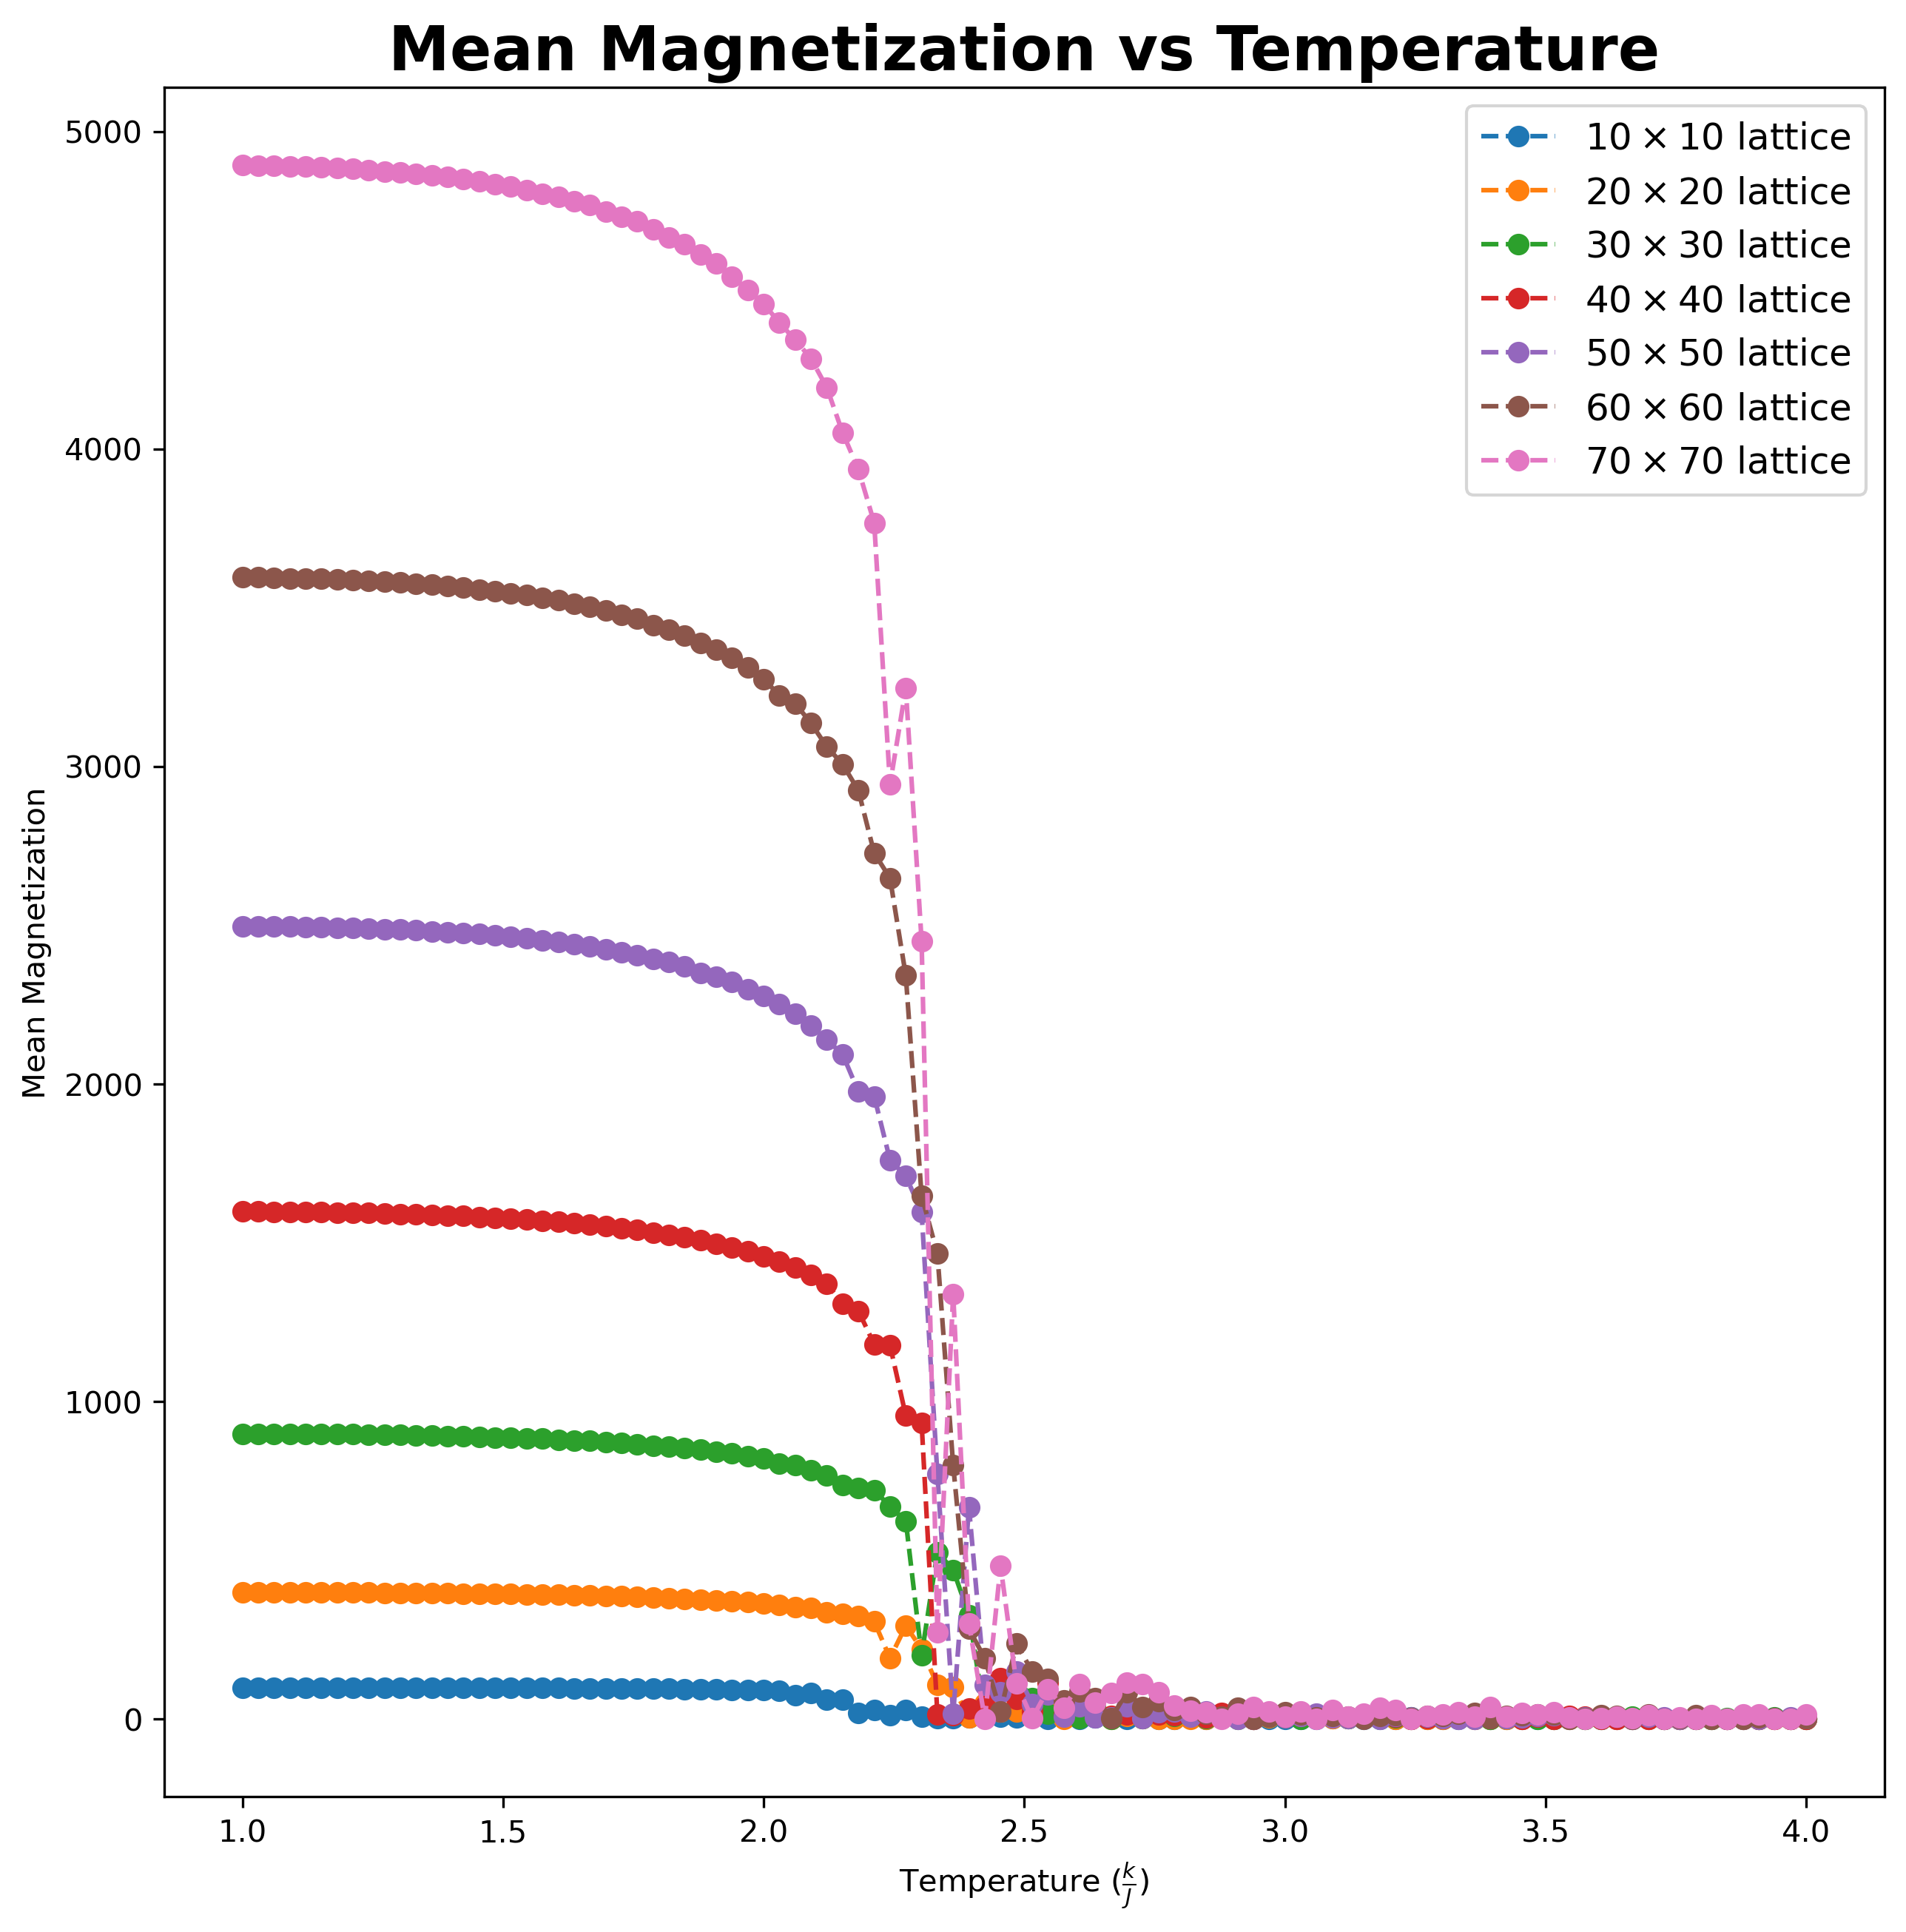

In [30]:
# plot mean magnetization
plt.figure(figsize=(10,10))
plt.plot(temperature, abs(MM_10), 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, abs(MM_20), 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, abs(MM_30), 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, abs(MM_40), 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, abs(MM_50), 'o--', label='$50 \\times 50$ lattice')
plt.plot(temperature, abs(MM_60), 'o--', label='$60 \\times 60$ lattice')
plt.plot(temperature, abs(MM_70), 'o--', label='$70 \\times 70$ lattice')
plt.title('Mean Magnetization vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{k}{J}$)')
plt.ylabel('Mean Magnetization')
plt.legend(fontsize=12)
plt.show()


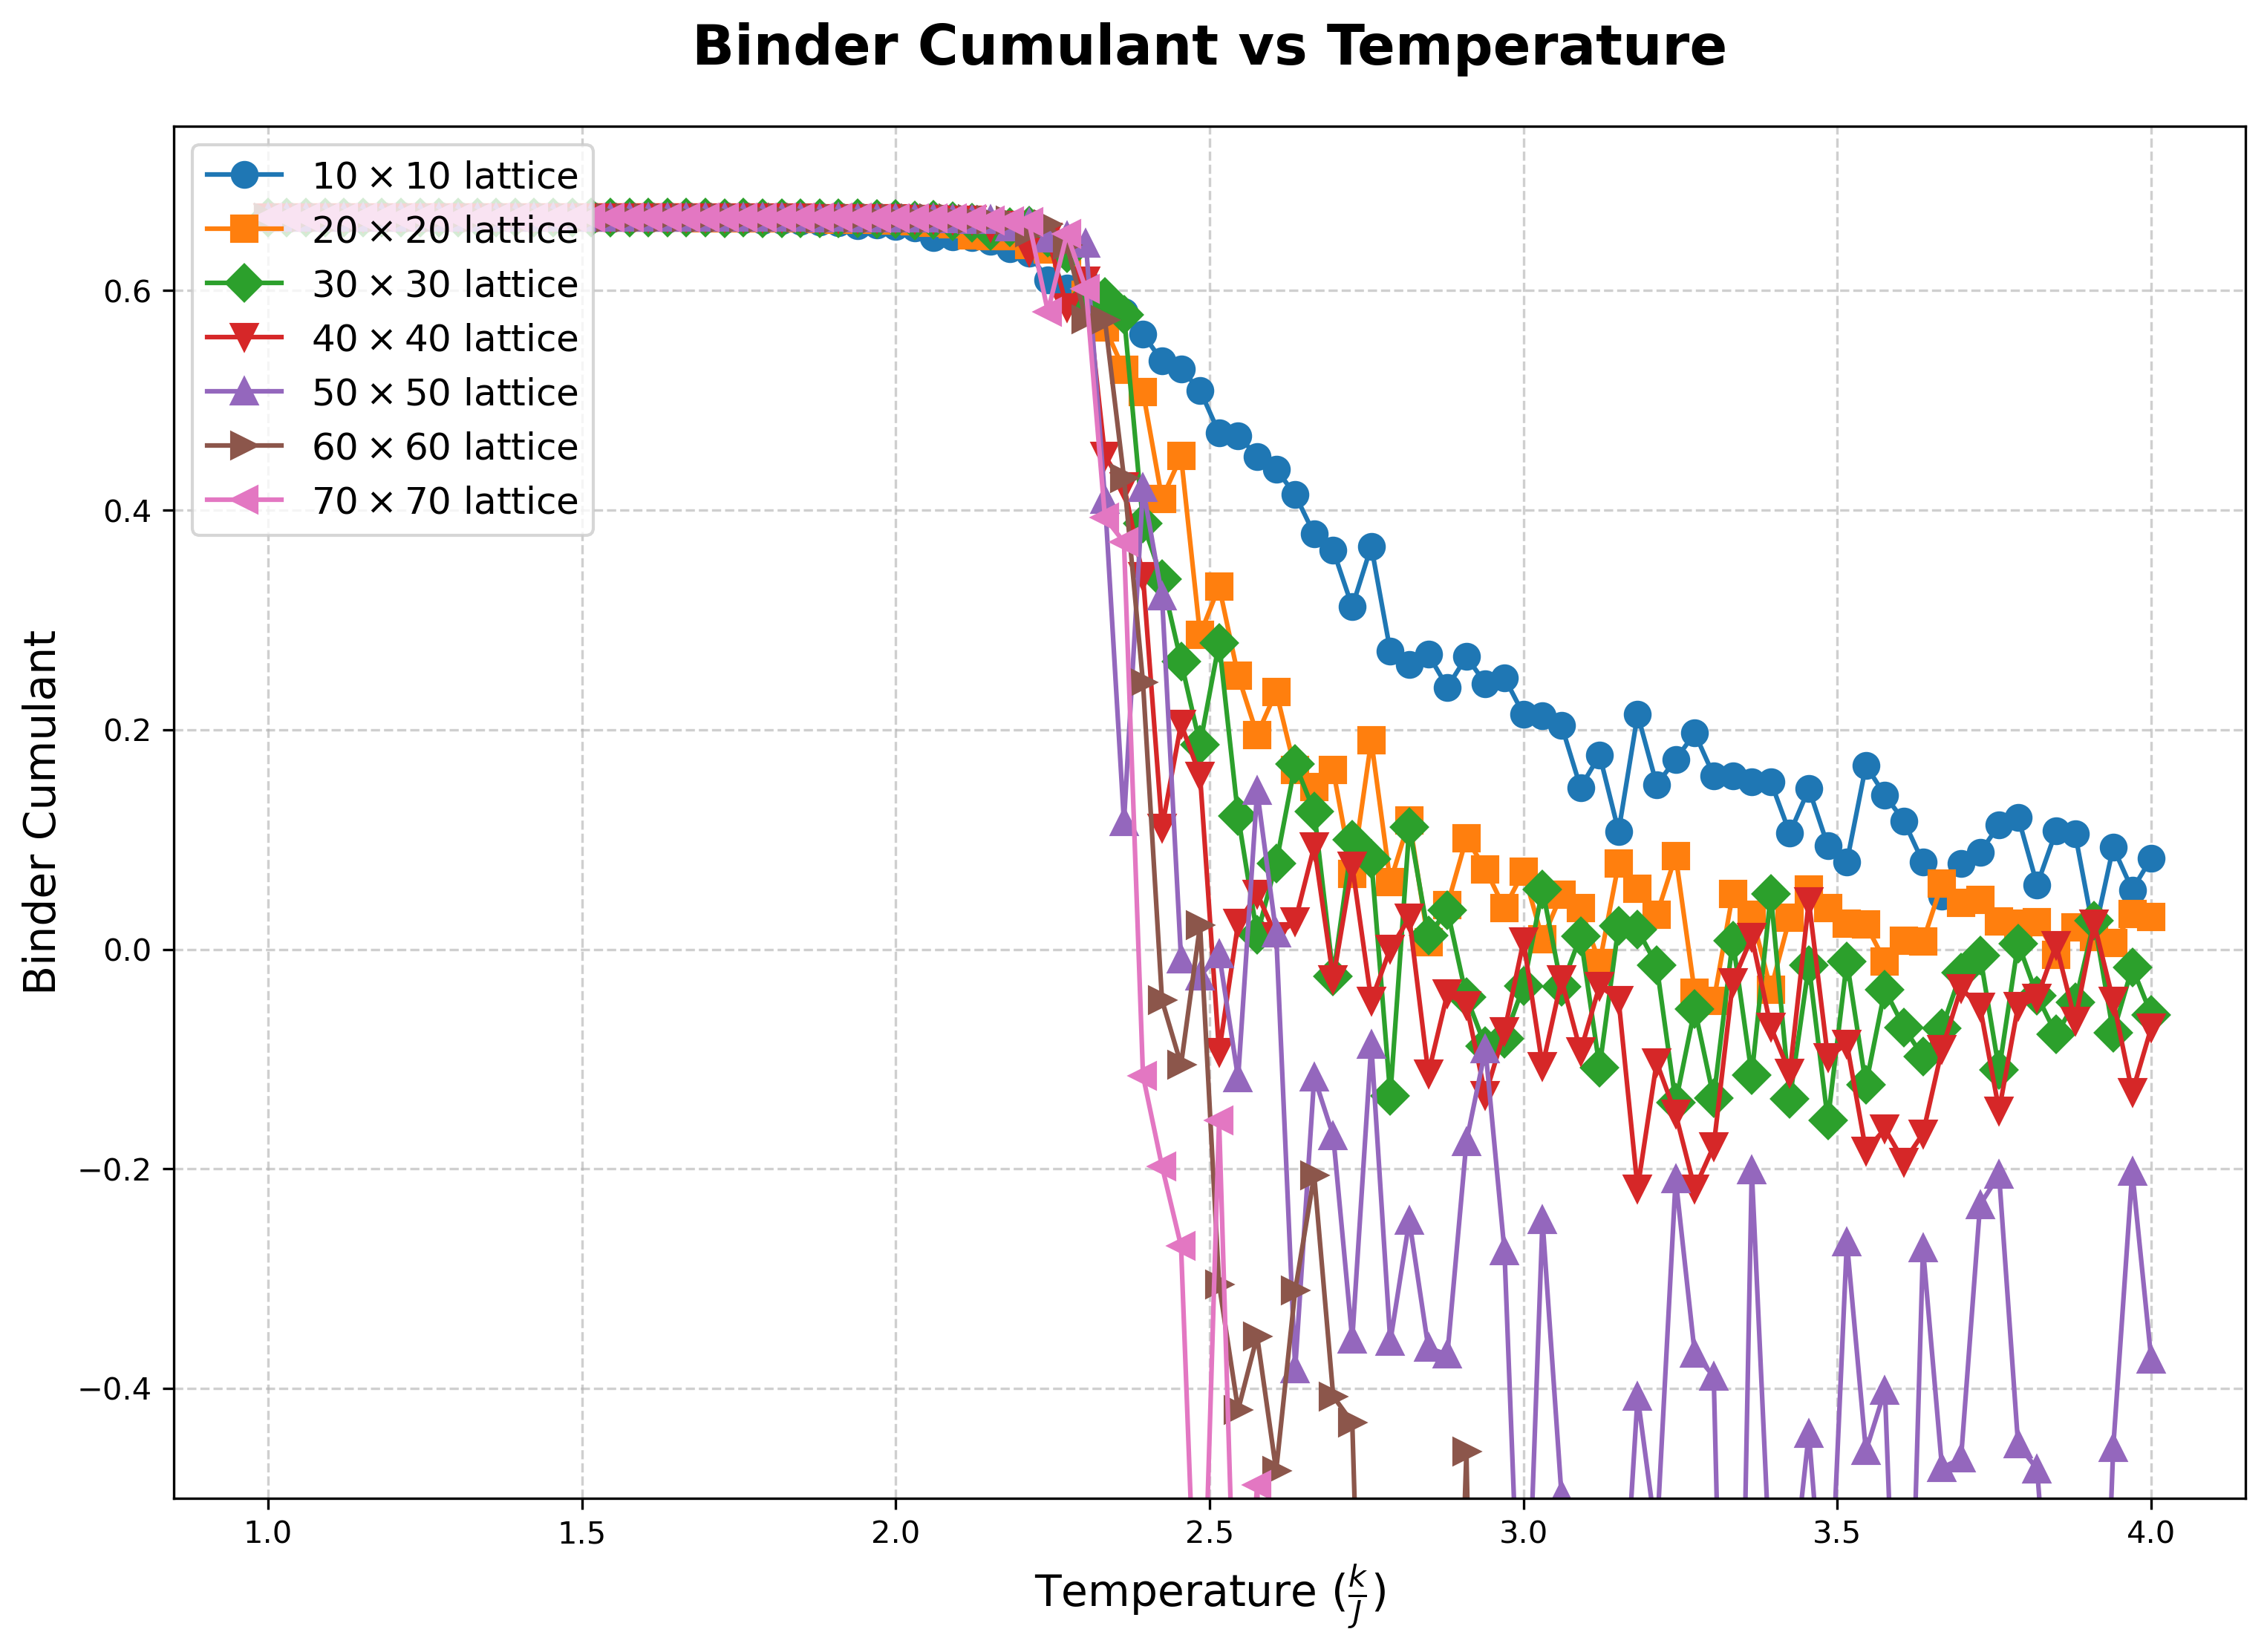

In [35]:
import matplotlib.pyplot as plt

# Assuming you have already defined your data: temperature, BC_10, BC_20, ..., BC_70

plt.figure(figsize=(12, 8))

# Use different colors and markers for each lattice size
plt.plot(temperature, BC_10, 'o-', label='$10 \\times 10$ lattice', markersize=8)
plt.plot(temperature, BC_20, 's-', label='$20 \\times 20$ lattice', markersize=8)
plt.plot(temperature, BC_30, 'D-', label='$30 \\times 30$ lattice', markersize=8)
plt.plot(temperature, BC_40, 'v-', label='$40 \\times 40$ lattice', markersize=8)
plt.plot(temperature, BC_50, '^-', label='$50 \\times 50$ lattice', markersize=8)
plt.plot(temperature, BC_60, '>-', label='$60 \\times 60$ lattice', markersize=8)
plt.plot(temperature, BC_70, '<-', label='$70 \\times 70$ lattice', markersize=8)

# Adjust y-axis limits for better visualization
plt.ylim(-0.5, 0.75)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Title settings
plt.title('Binder Cumulant vs Temperature', fontsize=18, fontweight='bold', pad=20)

# Axis label settings
plt.xlabel('Temperature ($\\frac{k}{J}$)', fontsize=14)
plt.ylabel('Binder Cumulant', fontsize=14)

# Legend settings
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()


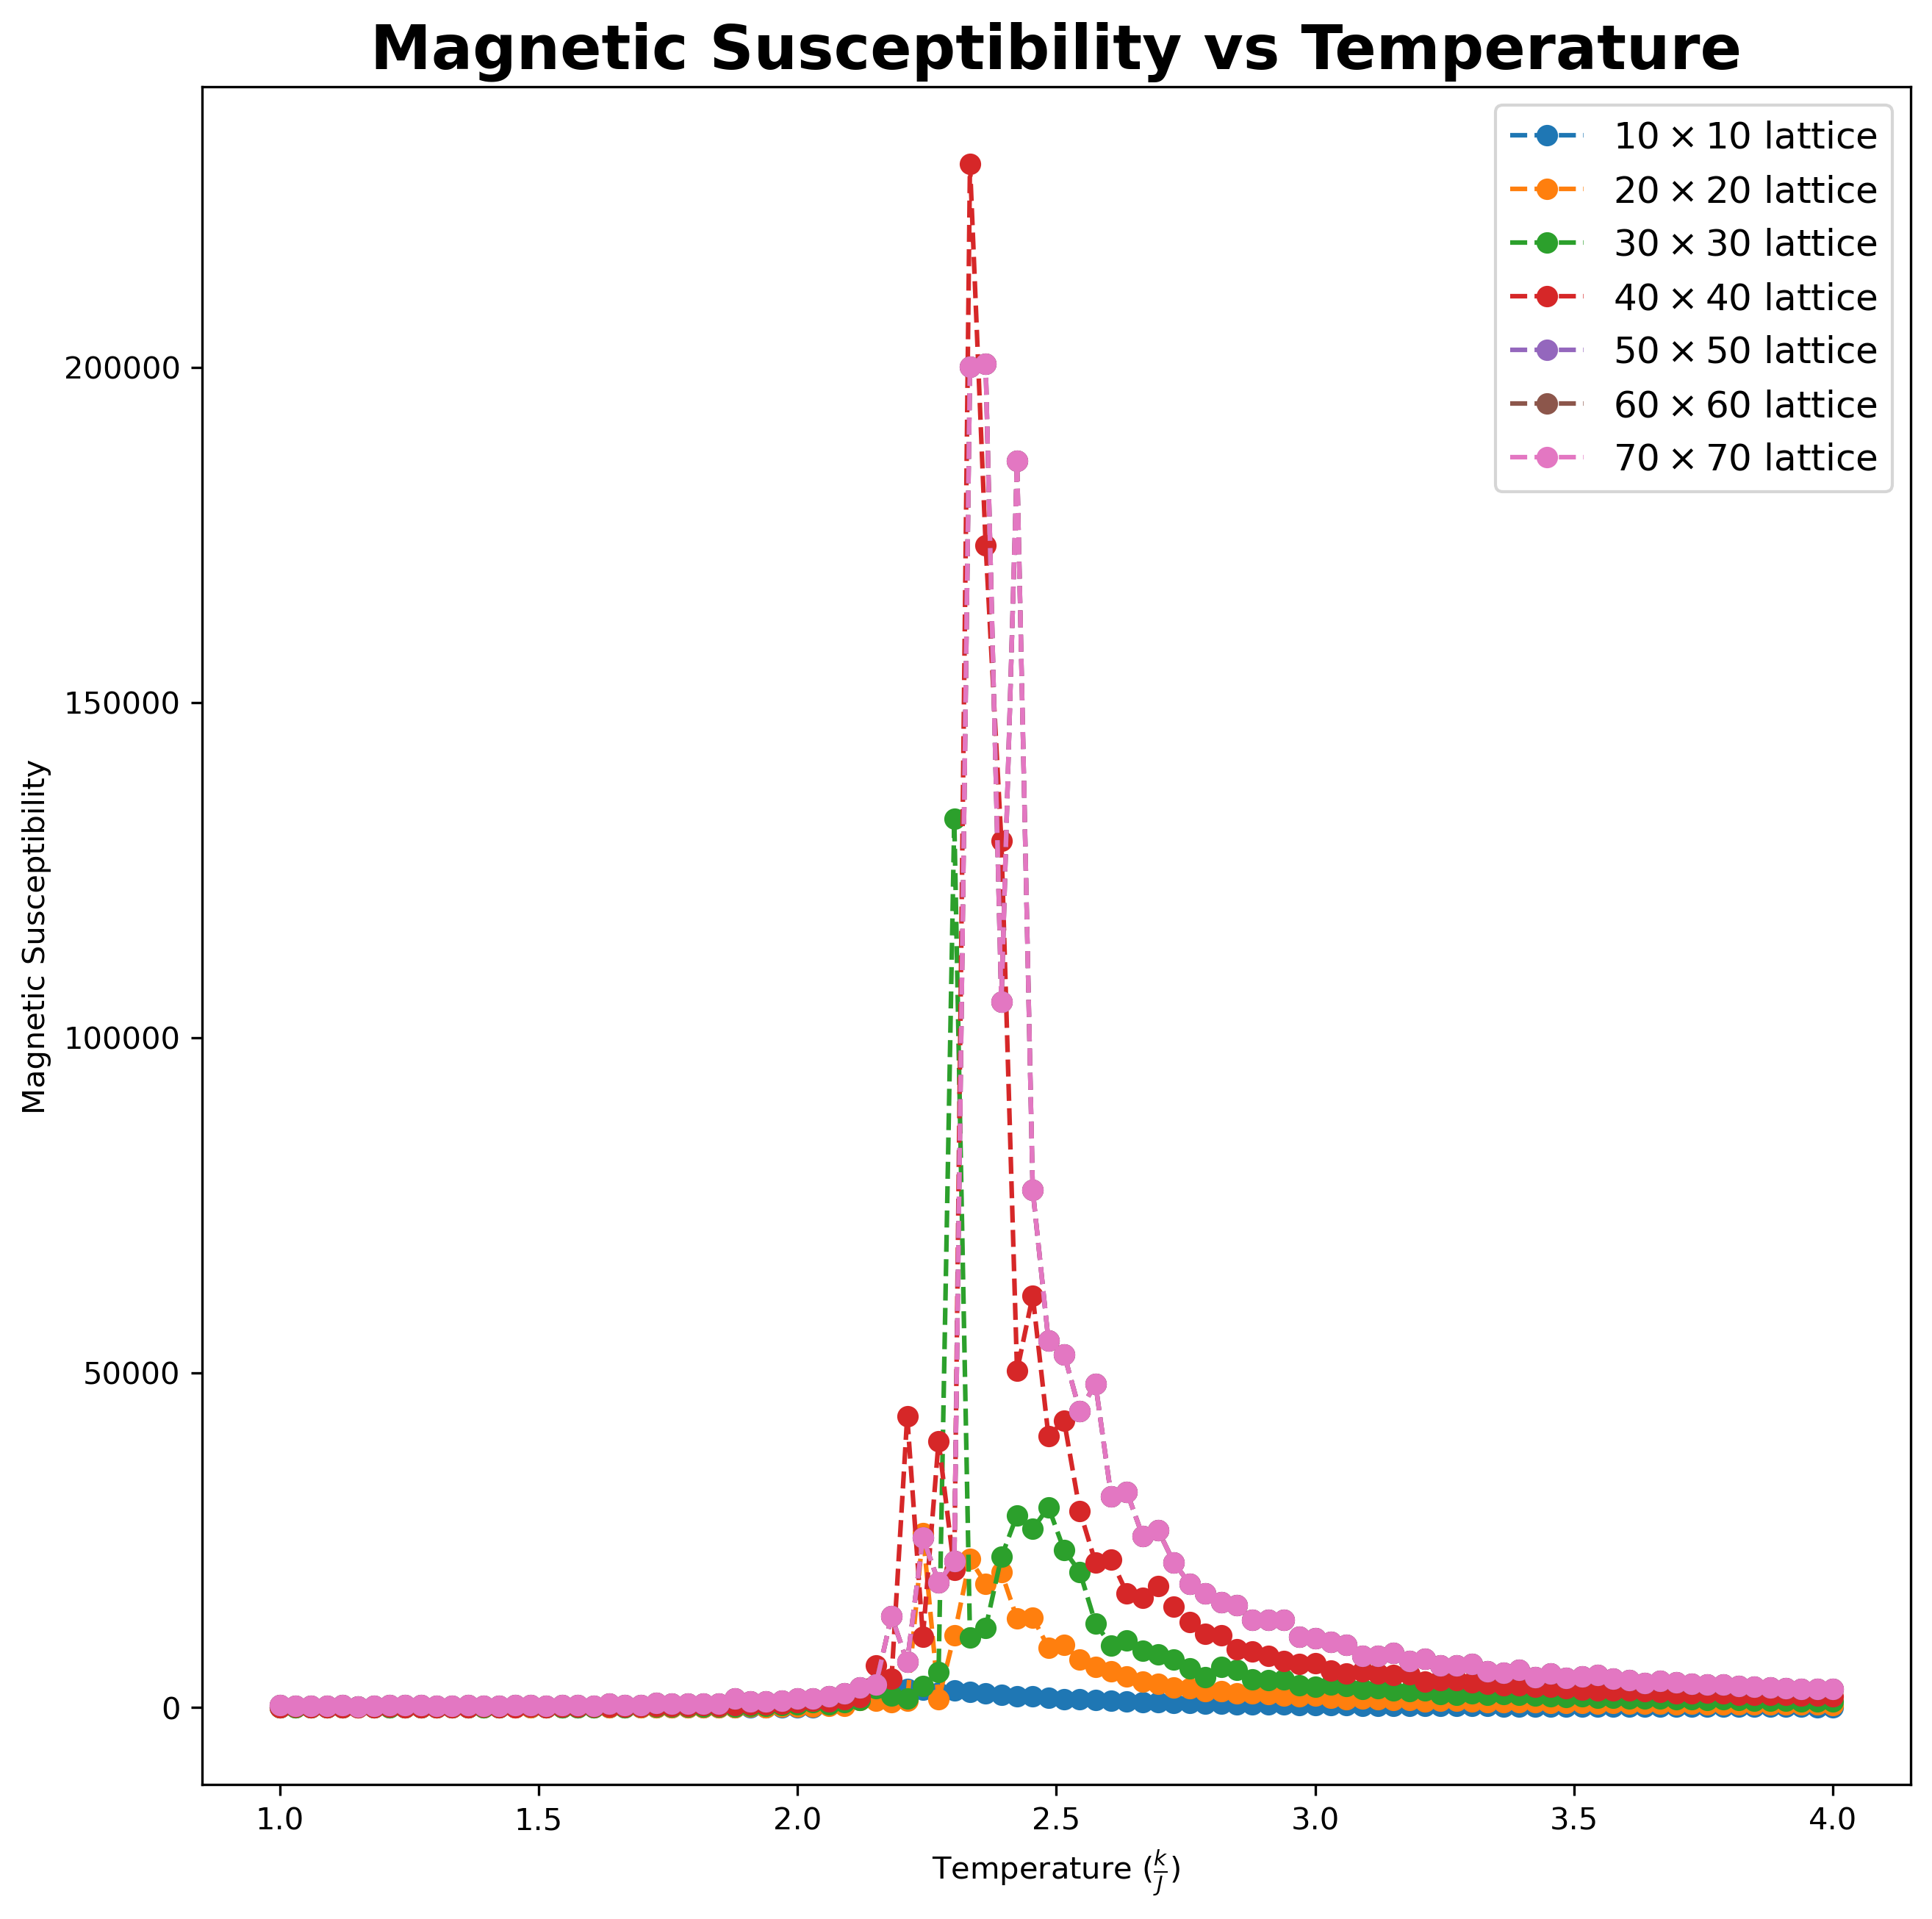

In [32]:
# plot magnetic susceptibility
plt.figure(figsize=(10,10))
plt.plot(temperature, MS_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, MS_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, MS_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, MS_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, MS_50, 'o--', label='$50 \\times 50$ lattice')
plt.plot(temperature, MS_60, 'o--', label='$60 \\times 60$ lattice')
plt.plot(temperature, MS_70, 'o--', label='$70 \\times 70$ lattice')
plt.title('Magnetic Susceptibility vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{k}{J}$)')
plt.ylabel('Magnetic Susceptibility')
plt.legend(fontsize=12)
plt.show()

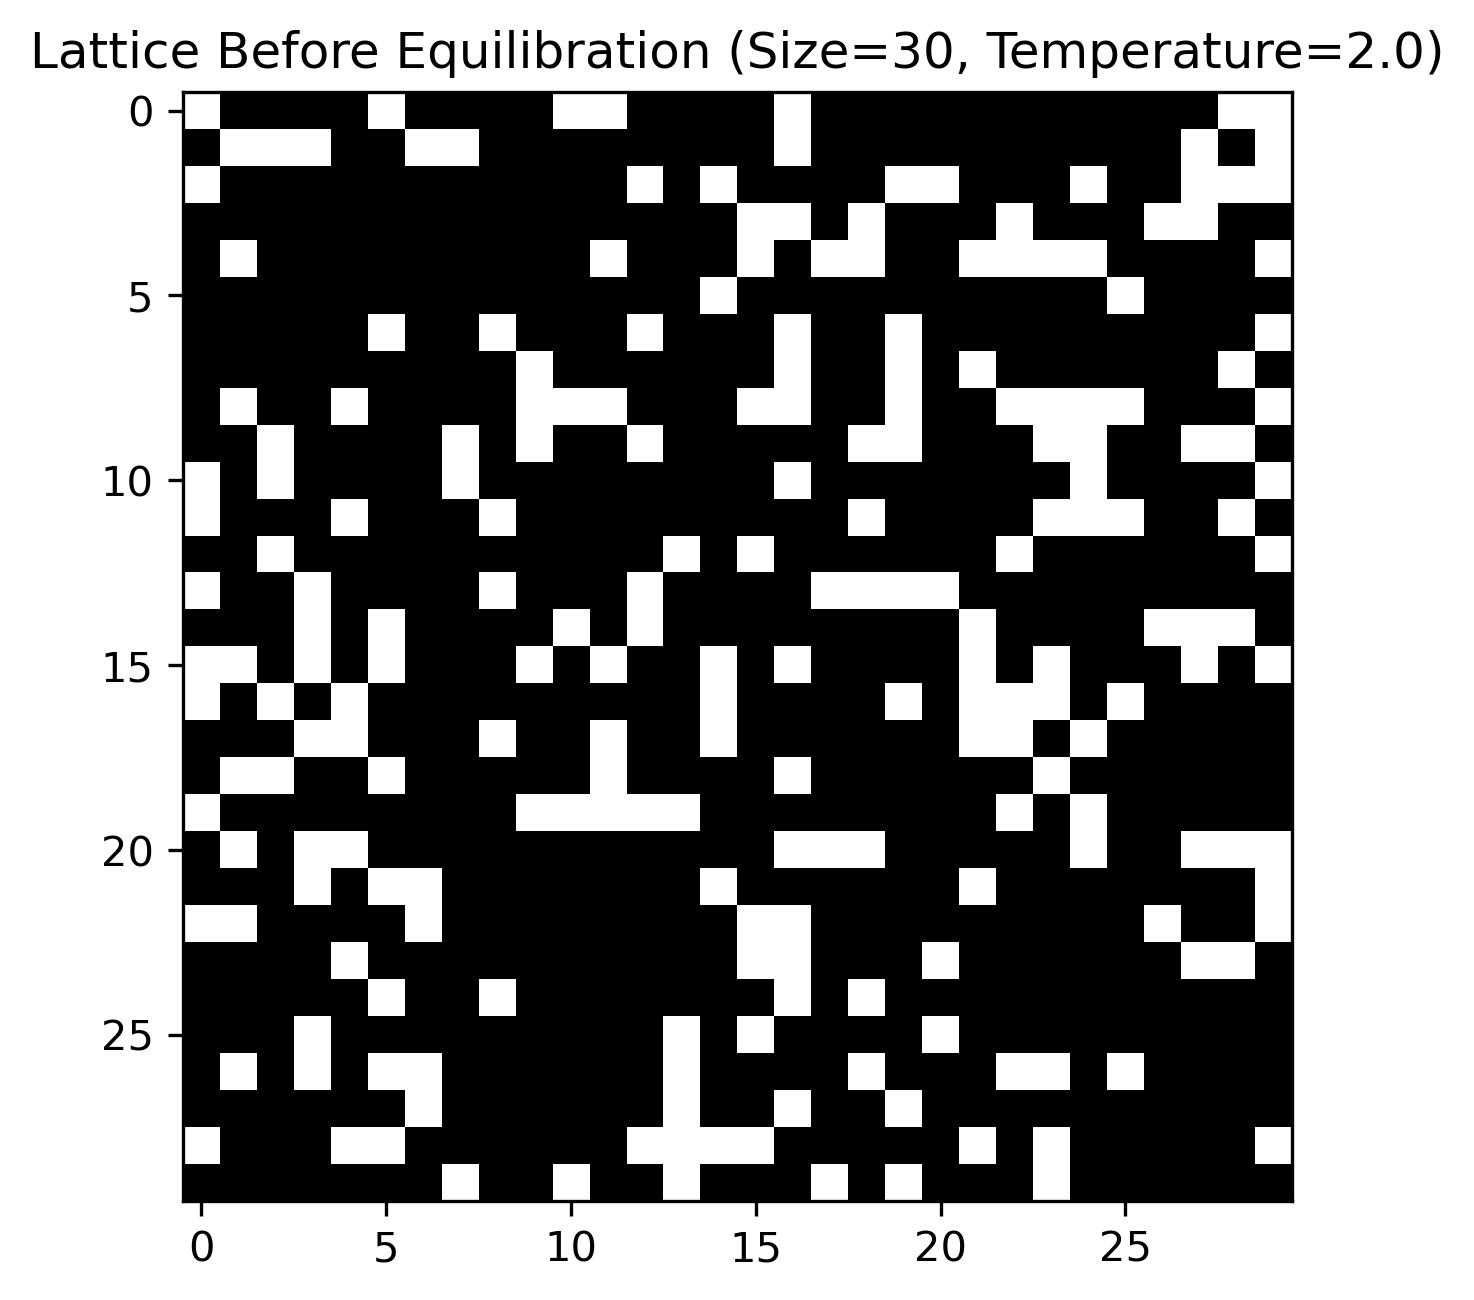

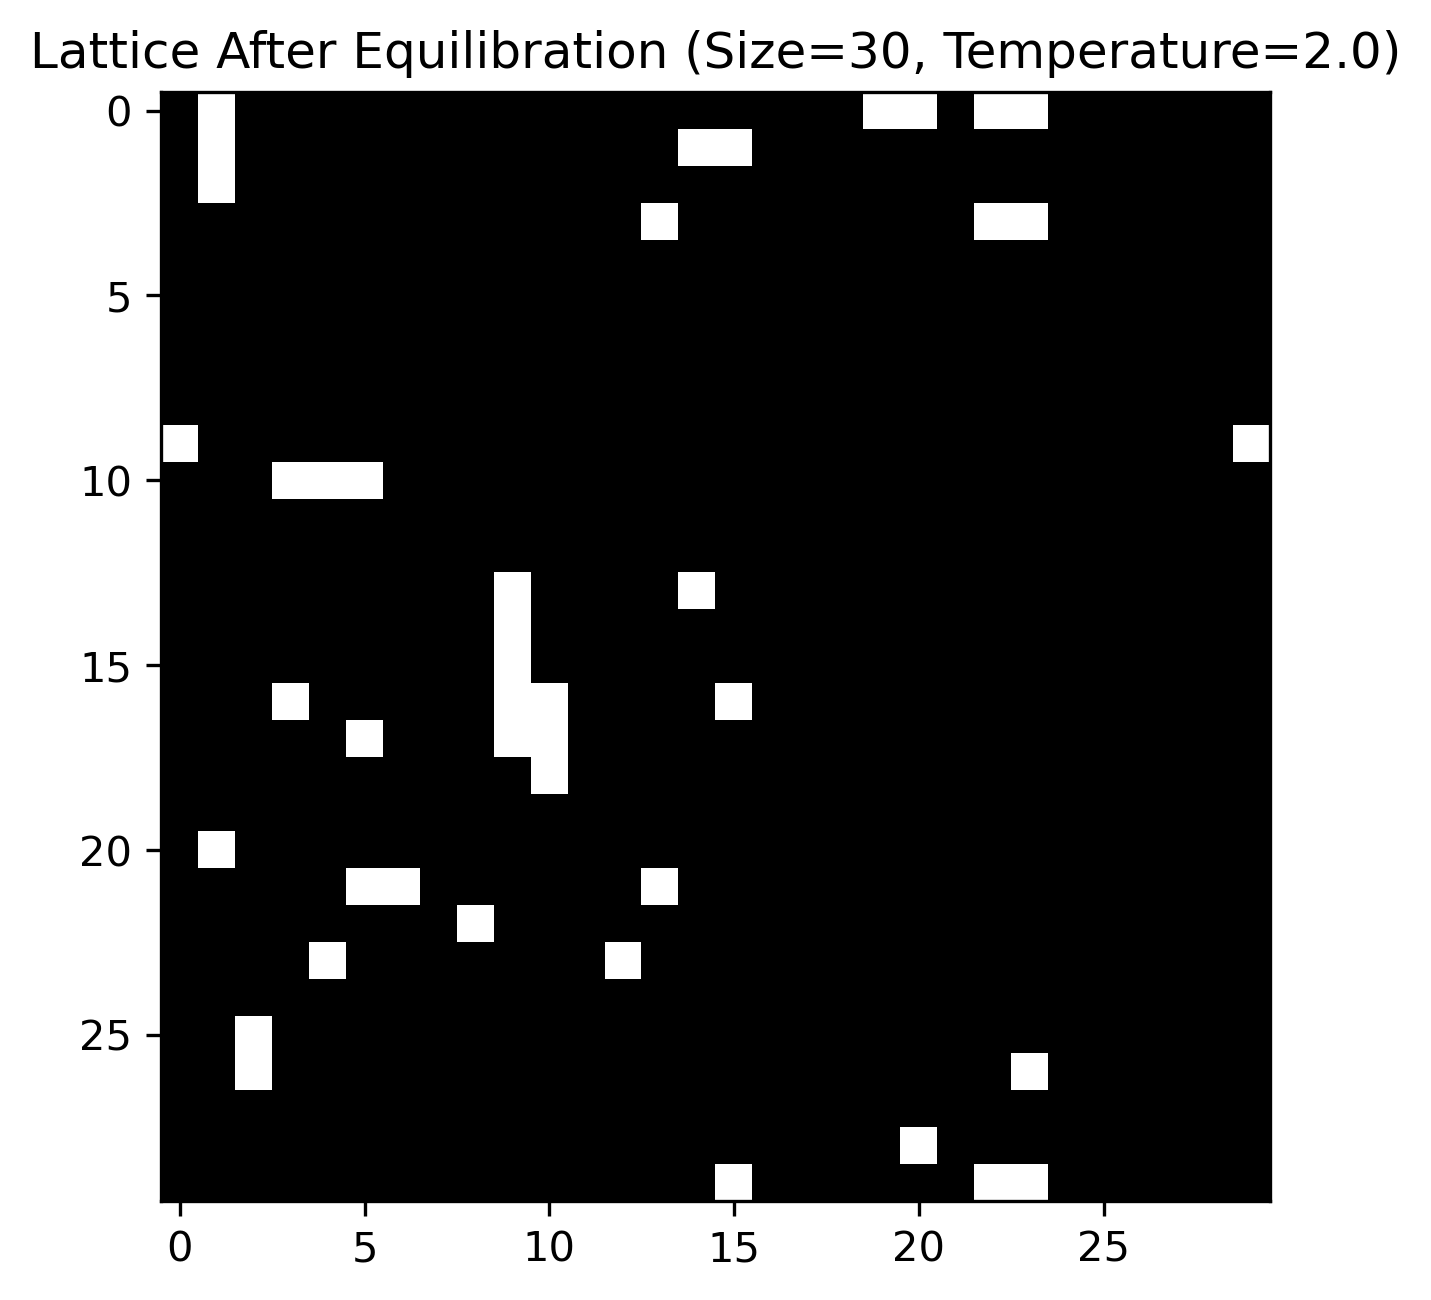

In [22]:
# Run the simulation for each size (size=30)
sizes = [30]
for size in sizes:
    for temperature in temperatures:
        # Run the simulation
        energy_vals, magnetization_vals, Lattice_init, Lattice_eq = run_simulation(size, temperature, num_steps, equilibration_steps)

        # Visualize lattice before and after equilibration when temperature is 2
        if temperature == 2:
            plt.figure()
            plt.imshow(Lattice_init, cmap='gray')
            plt.title(f'Lattice Before Equilibration (Size={size}, Temperature={temperature})')
            plt.show()

            plt.figure()
            plt.imshow(Lattice_eq, cmap='gray')
            plt.title(f'Lattice After Equilibration (Size={size}, Temperature={temperature})')
            plt.show()


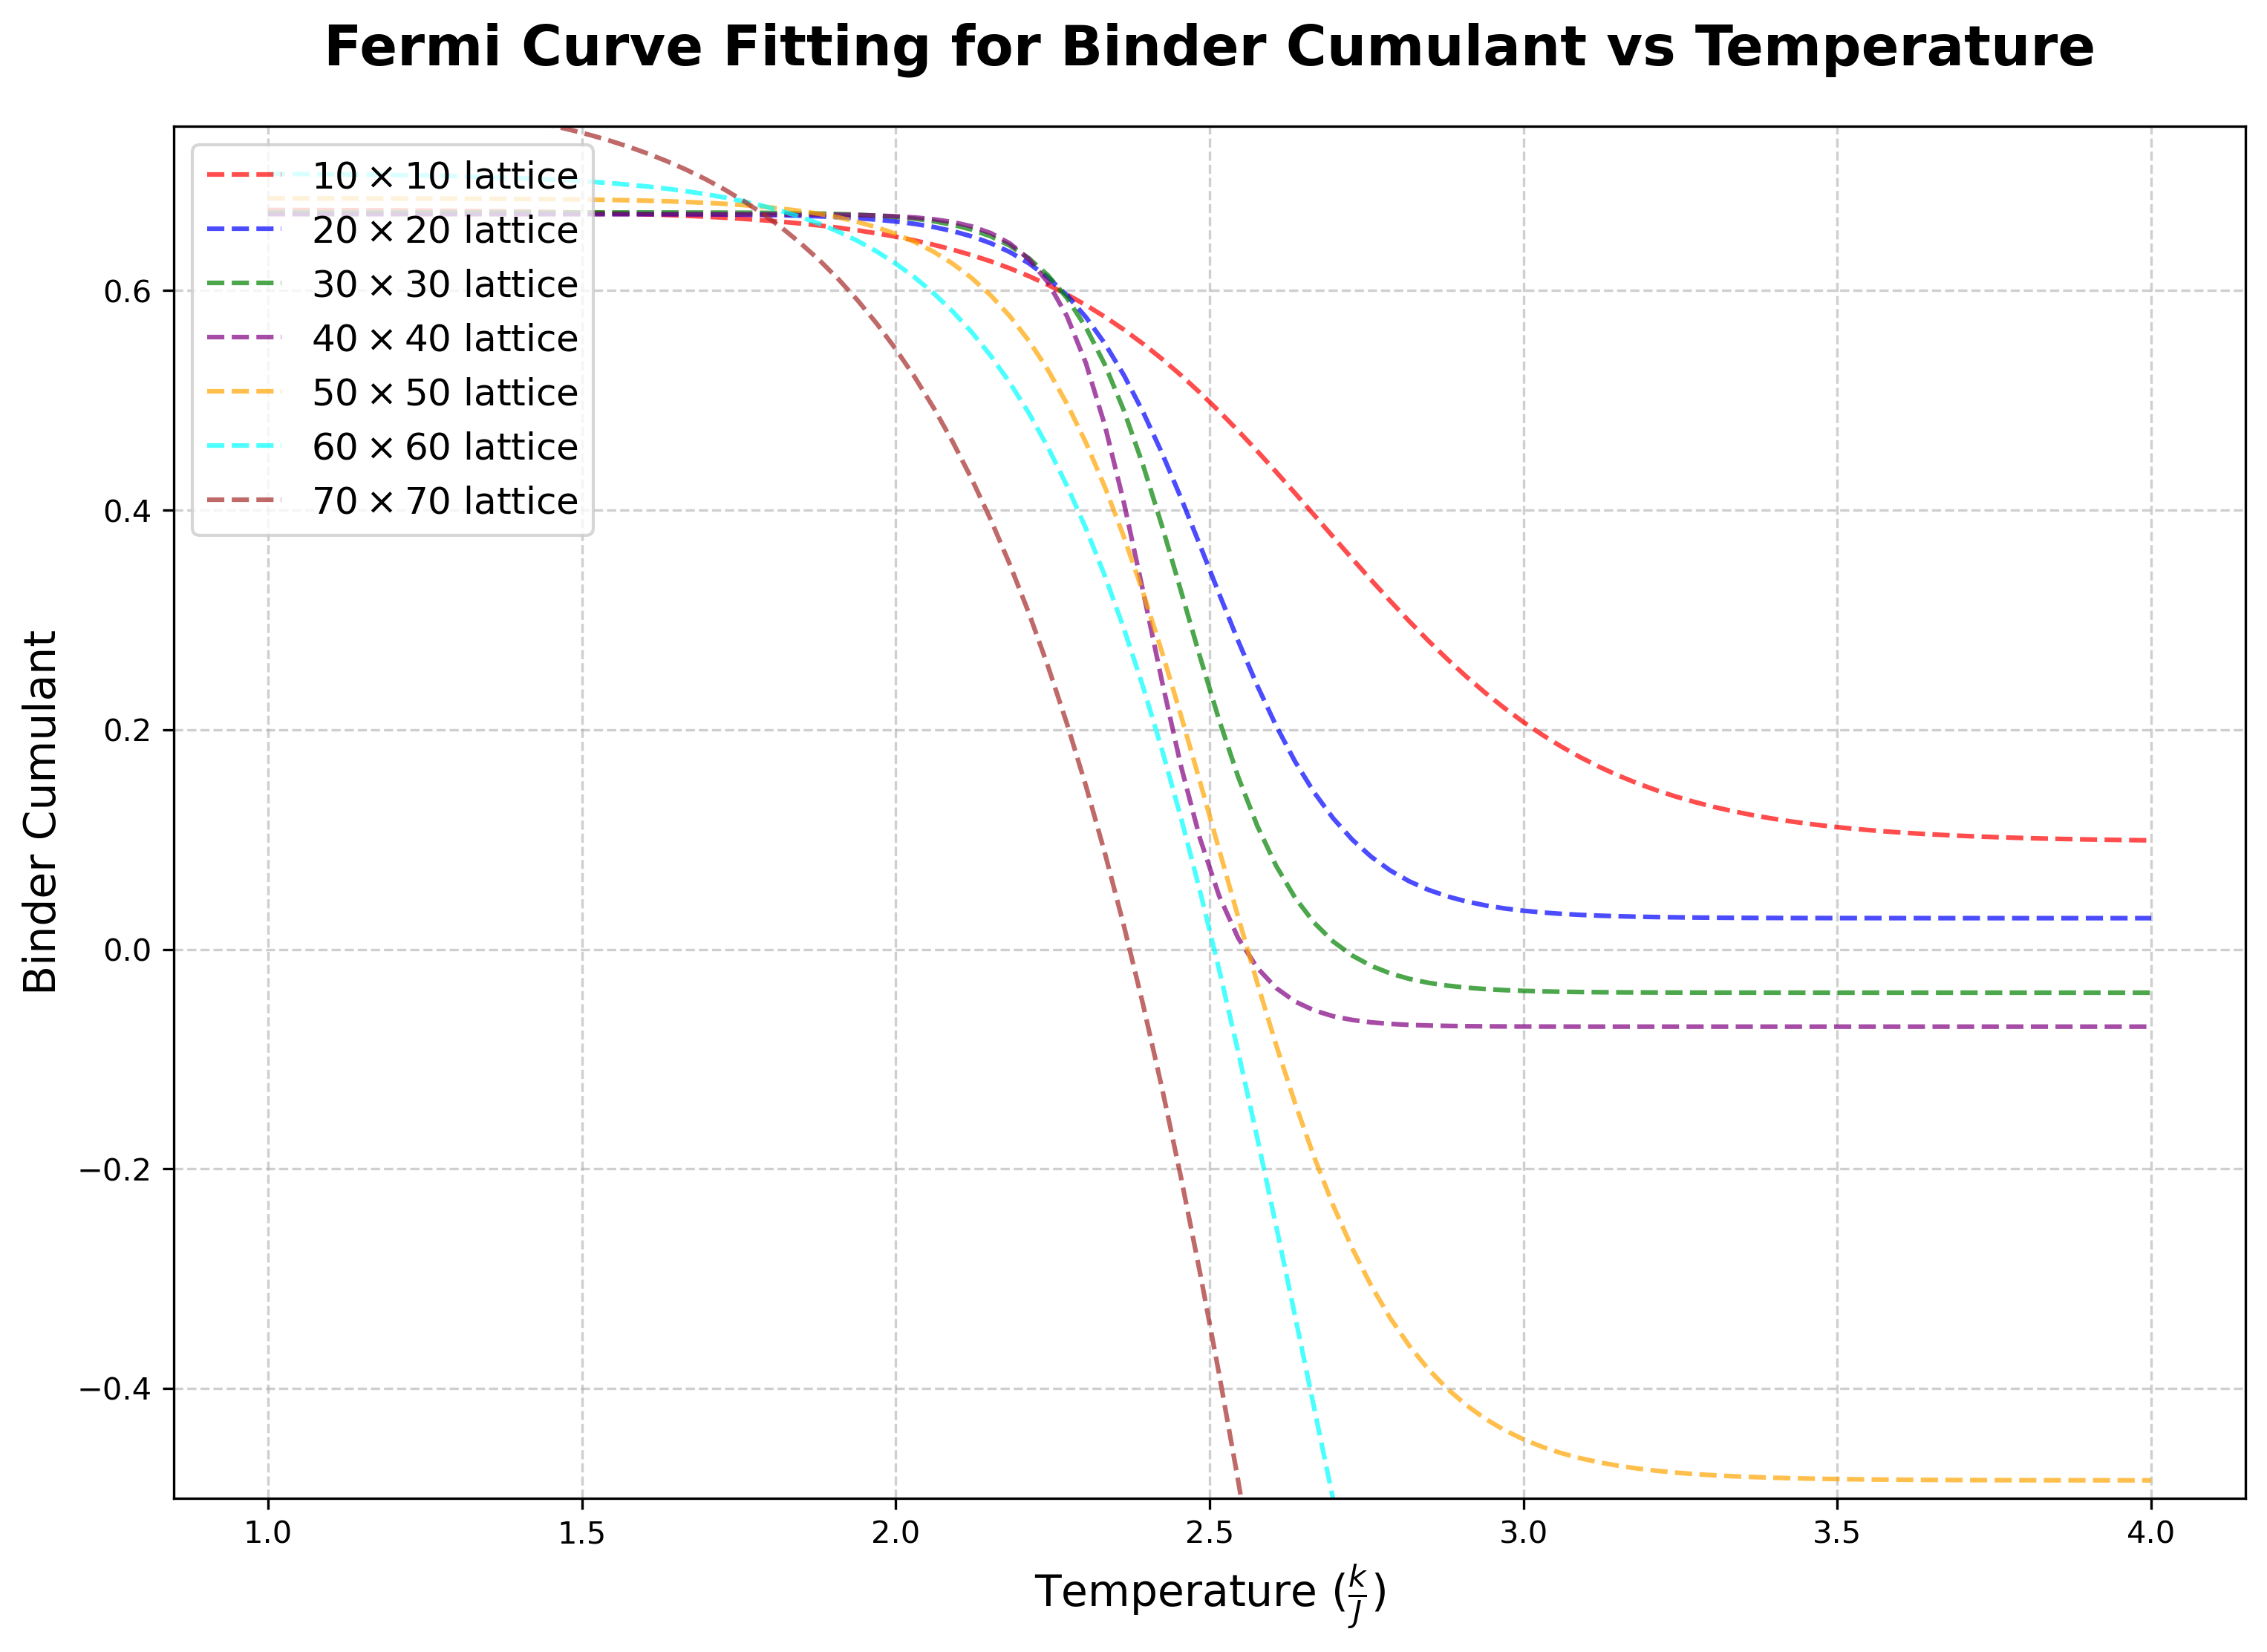

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Assuming you have already defined your data: temperature, BC_10, BC_20, ..., BC_70

def fermi_curve(x, A, B, C, D):
    """
    Fermi curve function
    A: amplitude
    B: center
    C: width
    D: offset
    """
    return A / (np.exp((x - B) / C) + 1) + D

# Initial guess for the parameters
initial_guess = (1, 0, 1, 0)

# Function to fit with curve_fit
def fit_curve(temperature, BC):
    params, _ = curve_fit(fermi_curve, temperature, BC, p0=initial_guess, maxfev=5000)
    return params

# Perform curve fitting for each lattice size
fit_params_10 = fit_curve(temperature, BC_10)
fit_params_20 = fit_curve(temperature, BC_20)
fit_params_30 = fit_curve(temperature, BC_30)
fit_params_40 = fit_curve(temperature, BC_40)
fit_params_50 = fit_curve(temperature, BC_50)
fit_params_60 = fit_curve(temperature, BC_60)
fit_params_70 = fit_curve(temperature, BC_70)

# Create a finer temperature array for smooth curve plotting
fine_temperature = np.linspace(min(temperature), max(temperature), 100)

# Define colors for each lattice size
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'brown']

# Plot the fitted Fermi curves only with different colors
plt.figure(figsize=(12, 8))
for i, (params, lattice_size) in enumerate(zip([fit_params_10, fit_params_20, fit_params_30, fit_params_40, fit_params_50, fit_params_60, fit_params_70], ['10', '20', '30', '40', '50', '60', '70'])):
    plt.plot(fine_temperature, fermi_curve(fine_temperature, *params), '--', label=f'${lattice_size} \\times {lattice_size}$ lattice', color=colors[i], alpha=0.7)

# Adjust y-axis limits for better visualization
plt.ylim(-0.5, 0.75)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Title settings
plt.title('Fermi Curve Fitting for Binder Cumulant vs Temperature', fontsize=18, fontweight='bold', pad=20)

# Axis label settings
plt.xlabel('Temperature ($\\frac{k}{J}$)', fontsize=14)
plt.ylabel('Binder Cumulant', fontsize=14)

# Legend settings
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()


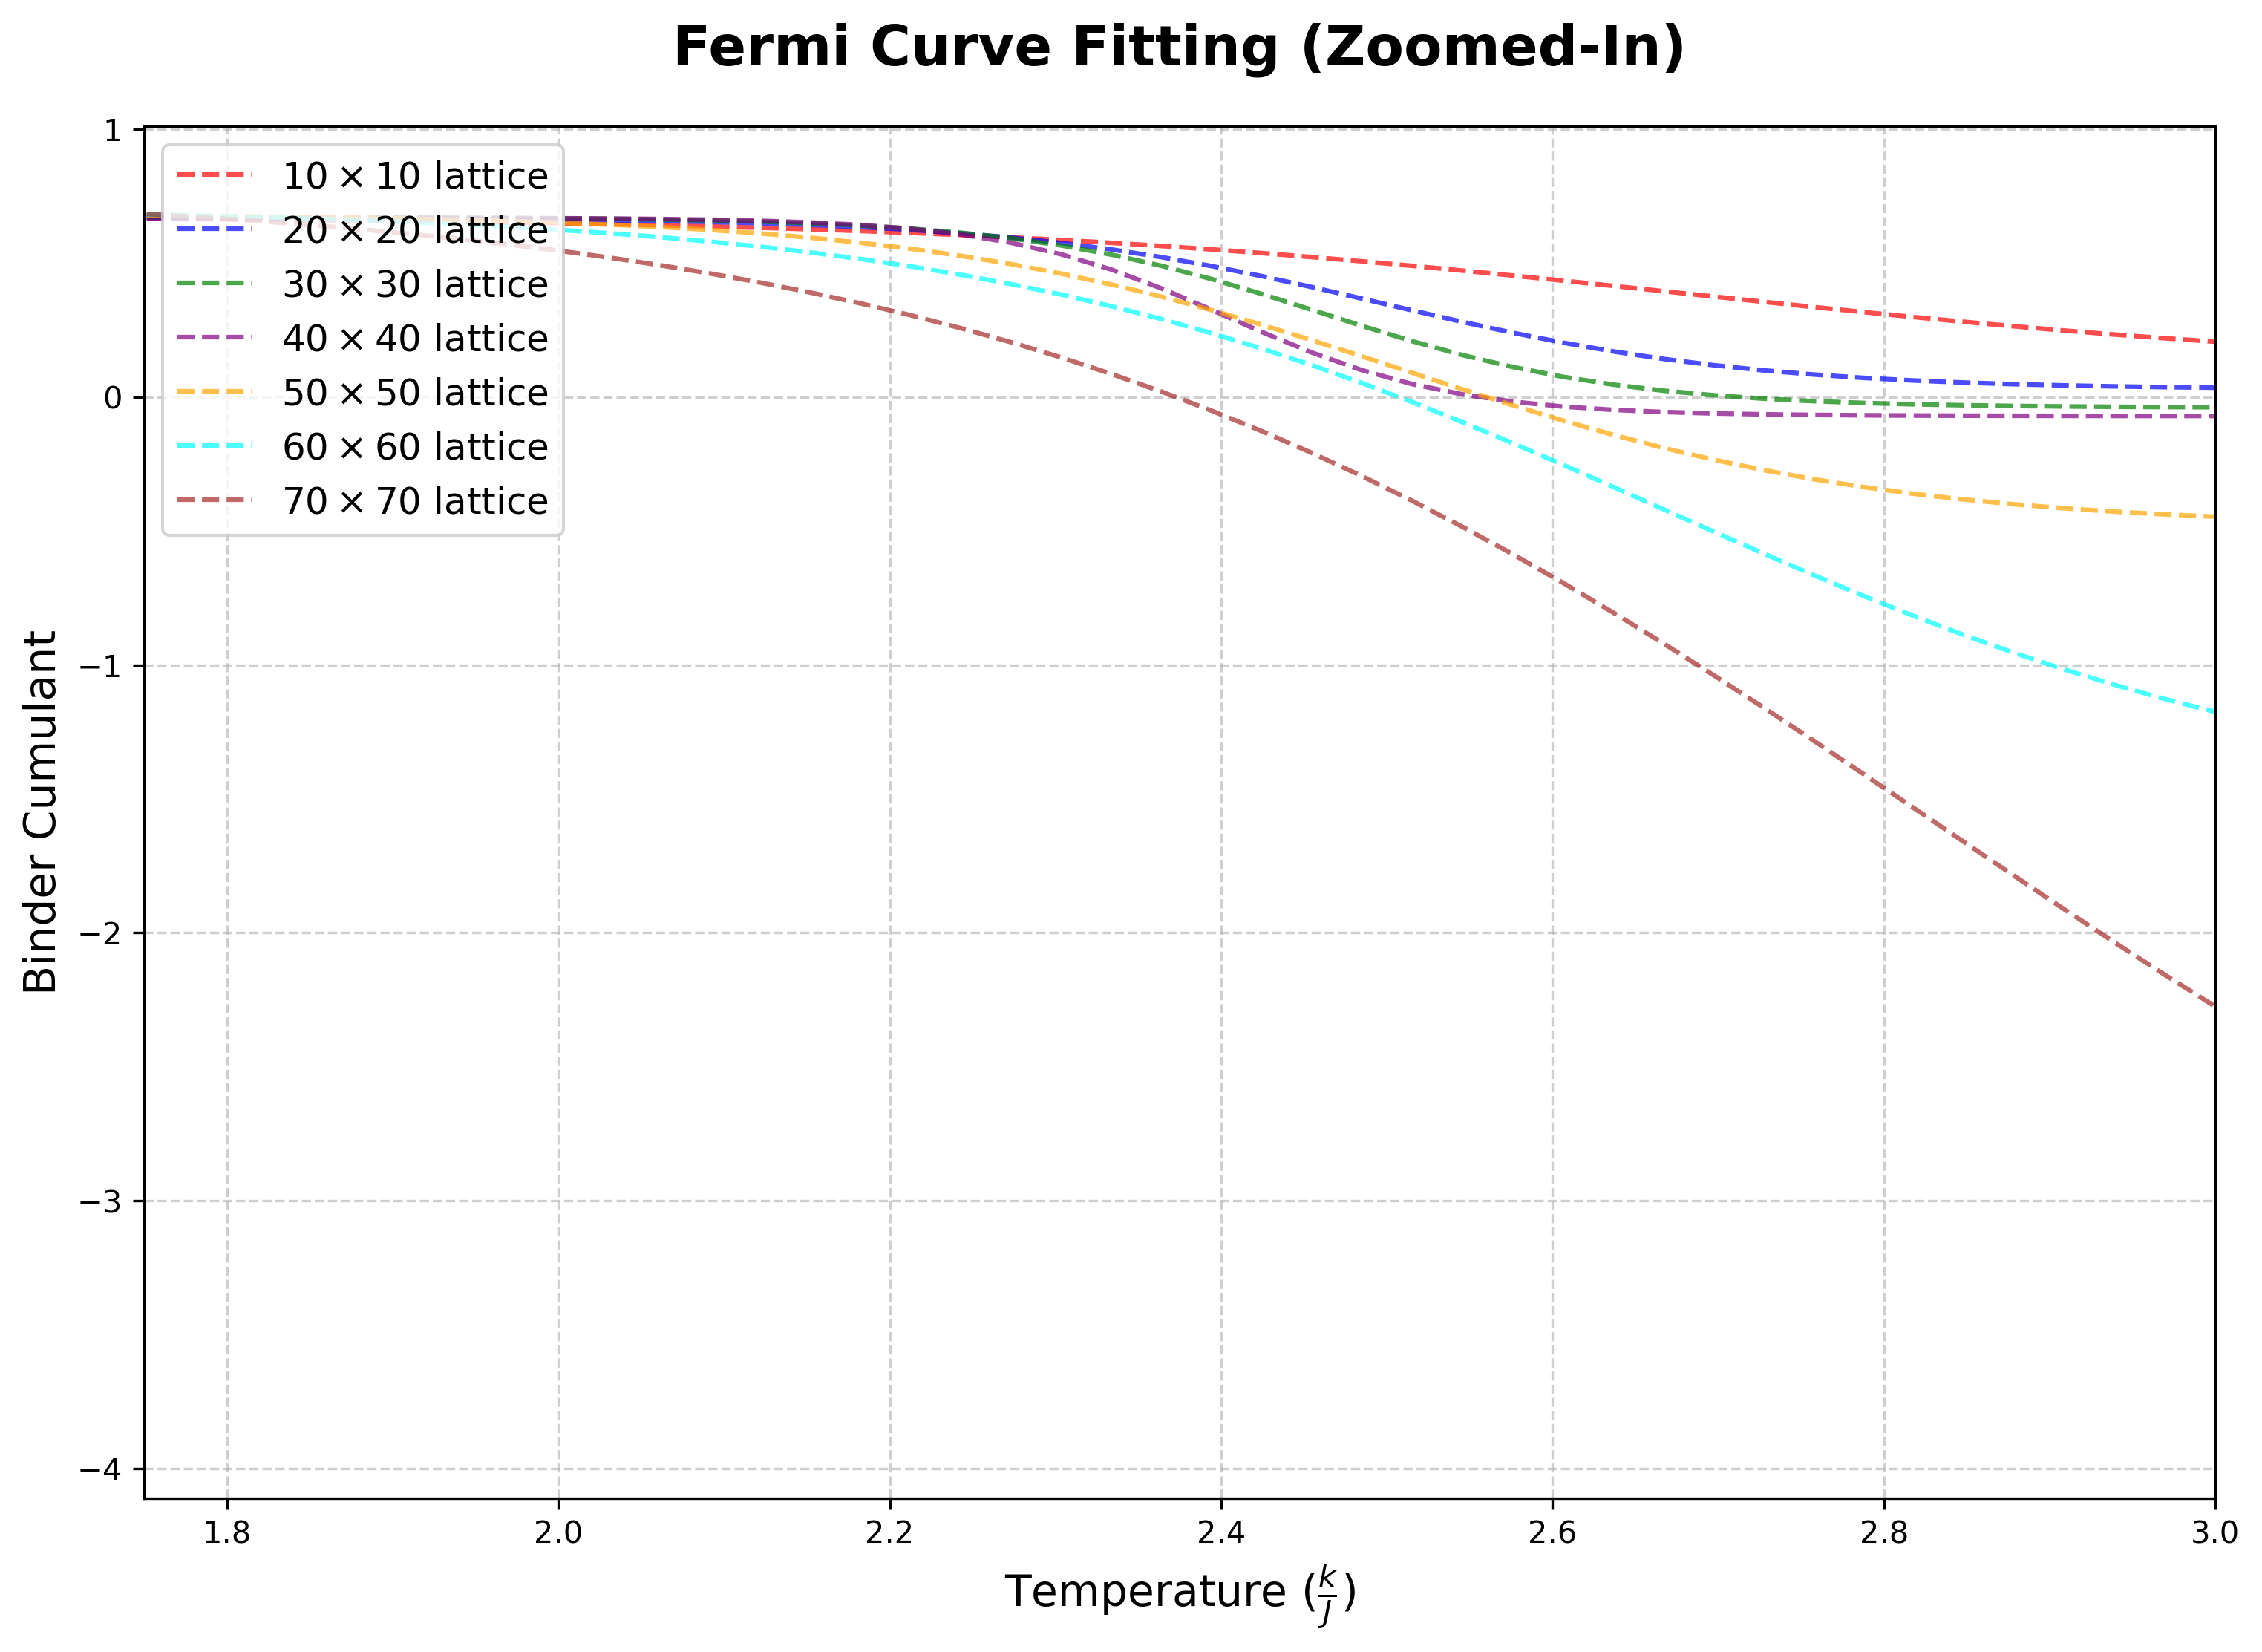

In [15]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Assuming you have already defined your data: temperature, BC_10, BC_20, ..., BC_70

def fermi_curve(x, A, B, C, D):
    """
    Fermi curve function
    A: amplitude
    B: center
    C: width
    D: offset
    """
    return A / (np.exp((x - B) / C) + 1) + D

# Initial guess for the parameters
initial_guess = (1, 0, 1, 0)

# Function to fit with curve_fit
def fit_curve(temperature, BC):
    params, _ = curve_fit(fermi_curve, temperature, BC, p0=initial_guess, maxfev=5000)
    return params

# Perform curve fitting for each lattice size
fit_params_10 = fit_curve(temperature, BC_10)
fit_params_20 = fit_curve(temperature, BC_20)
fit_params_30 = fit_curve(temperature, BC_30)
fit_params_40 = fit_curve(temperature, BC_40)
fit_params_50 = fit_curve(temperature, BC_50)
fit_params_60 = fit_curve(temperature, BC_60)
fit_params_70 = fit_curve(temperature, BC_70)

# Create a finer temperature array for smooth curve plotting
fine_temperature = np.linspace(min(temperature), max(temperature), 100)

# Define colors for each lattice size
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'brown']

# Plot the fitted Fermi curves without intersection points
plt.figure(figsize=(12, 8))
for i, (params, lattice_size) in enumerate(zip([fit_params_10, fit_params_20, fit_params_30, fit_params_40, fit_params_50, fit_params_60, fit_params_70], ['10', '20', '30', '40', '50', '60', '70'])):
    plt.plot(fine_temperature, fermi_curve(fine_temperature, *params), '--', label=f'${lattice_size} \\times {lattice_size}$ lattice', color=colors[i], alpha=0.7)

# Set the temperature range for the zoomed-in plot
plt.xlim(1.75, 3)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Title settings
plt.title('Fermi Curve Fitting (Zoomed-In)', fontsize=18, fontweight='bold', pad=20)

# Axis label settings
plt.xlabel('Temperature ($\\frac{k}{J}$)', fontsize=14)
plt.ylabel('Binder Cumulant', fontsize=14)

# Legend settings
plt.legend(fontsize=12, loc='upper left')

# Show the plot
plt.show()


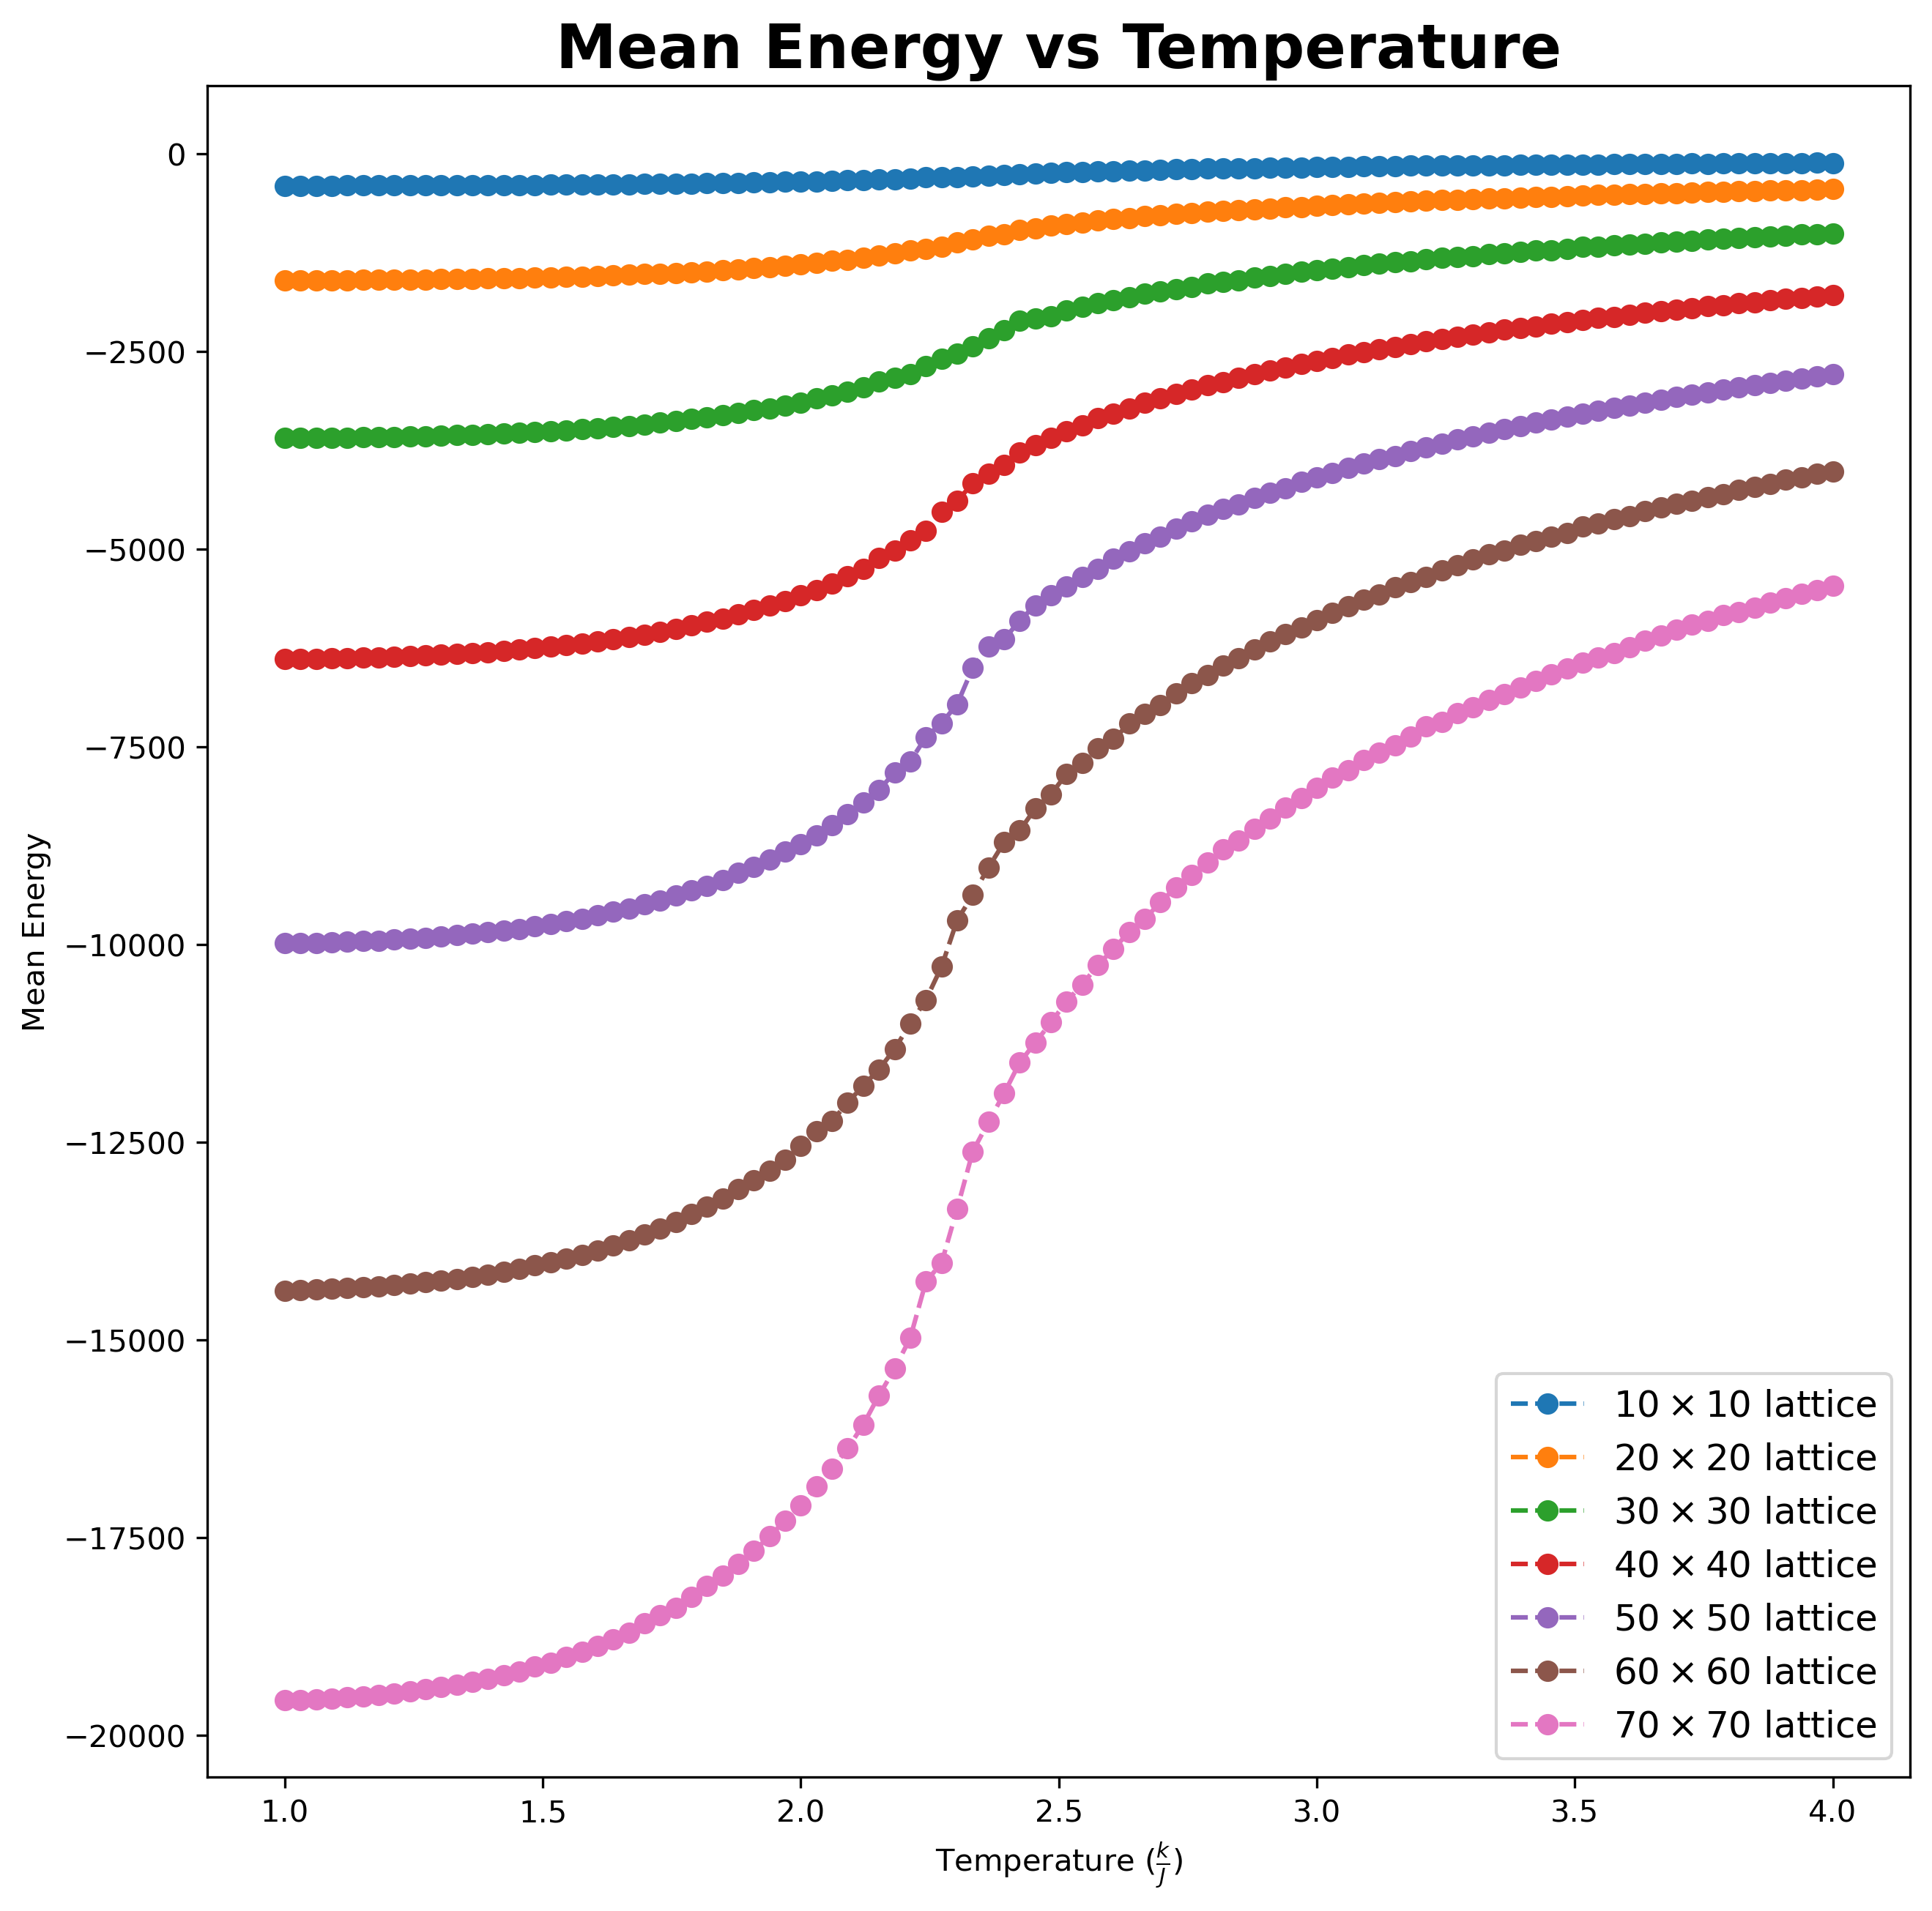

In [18]:
# plot mean energy
plt.figure(figsize=(10,10))
plt.plot(temperature, ME_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, ME_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, ME_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, ME_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, ME_50, 'o--', label='$50 \\times 50$ lattice')
plt.plot(temperature, ME_60, 'o--', label='$60 \\times 60$ lattice')
plt.plot(temperature, ME_70, 'o--', label='$70 \\times 70$ lattice')
plt.title('Mean Energy vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{k}{J}$)')
plt.ylabel('Mean Energy')
plt.legend(fontsize=12)
plt.show()